In [1]:
import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.image import imread
from skimage import io
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from tensorflow.keras.applications.resnet import ResNet152, preprocess_input, decode_predictions, ResNet50
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, Activation, Input, Conv2D, MaxPooling2D, BatchNormalization
import random
import os
import glob
import shutil
import PIL

%matplotlib inline


In [2]:
pwd

'c:\\Users\\tr_co\\OneDrive\\Masaüstü\\Techpro_Education\\Deep_Learning\\Proje\\CNN_Flowers'

In [3]:
my_data = "Flowers_train"

In [4]:
os.listdir(my_data) 

['train']

In [5]:
train_path = my_data+'/train/'

In [6]:
os.listdir(train_path)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [7]:
os.listdir(train_path+'daisy')[:30]

['100080576_f52e8ee070_n.jpg',
 '10140303196_b88d3d6cec.jpg',
 '10172379554_b296050f82_n.jpg',
 '10172567486_2748826a8b.jpg',
 '102841525_bd6628ae3c.jpg',
 '1031799732_e7f4008c03.jpg',
 '10391248763_1d16681106_n.jpg',
 '10437754174_22ec990b77_m.jpg',
 '10437929963_bc13eebe0c.jpg',
 '10466290366_cc72e33532.jpg',
 '10466558316_a7198b87e2.jpg',
 '10555749515_13a12a026e.jpg',
 '10555815624_dc211569b0.jpg',
 '10559679065_50d2b16f6d.jpg',
 '105806915_a9c13e2106_n.jpg',
 '10712722853_5632165b04.jpg',
 '107592979_aaa9cdfe78_m.jpg',
 '10770585085_4742b9dac3_n.jpg',
 '10841136265_af473efc60.jpg',
 '10993818044_4c19b86c82.jpg',
 '10994032453_ac7f8d9e2e.jpg',
 '11023214096_b5b39fab08.jpg',
 '11023272144_fce94401f2_m.jpg',
 '11023277956_8980d53169_m.jpg',
 '11124324295_503f3a0804.jpg',
 '1140299375_3aa7024466.jpg',
 '11439894966_dca877f0cd.jpg',
 '1150395827_6f94a5c6e4_n.jpg',
 '11642632_1e7627a2cc.jpg',
 '11834945233_a53b7a92ac_m.jpg']

In [8]:
os.listdir(train_path+'daisy')[17]

'10770585085_4742b9dac3_n.jpg'

In [9]:
para_cell = train_path+'daisy'+'/10770585085_4742b9dac3_n.jpg'

In [10]:
imread(para_cell) # " imread "  görüntünün piksel değerlerini içeren numpy array şeklinde getirir

array([[[116, 130,  45],
        [108, 126,  42],
        [103, 128,  45],
        ...,
        [  0, 148,   1],
        [  0, 147,   1],
        [  2, 146,   0]],

       [[116, 129,  47],
        [110, 129,  47],
        [103, 132,  48],
        ...,
        [  0, 150,   3],
        [  0, 148,   2],
        [  0, 146,   0]],

       [[117, 130,  50],
        [112, 134,  52],
        [105, 139,  55],
        ...,
        [  1, 151,   2],
        [  0, 148,   2],
        [  0, 146,   0]],

       ...,

       [[ 42,  69,   0],
        [ 50,  78,   4],
        [ 53,  80,   1],
        ...,
        [  1,  70,   3],
        [  1,  72,   2],
        [  2,  73,   3]],

       [[ 41,  67,   4],
        [ 47,  74,   7],
        [ 47,  75,   1],
        ...,
        [  2,  76,   1],
        [  0,  76,   1],
        [  0,  76,   1]],

       [[ 38,  64,   3],
        [ 43,  69,   6],
        [ 42,  69,   0],
        ...,
        [  3,  80,   0],
        [  0,  79,   0],
        [  0,  78,   0]]

In [11]:
para_img= imread(para_cell)

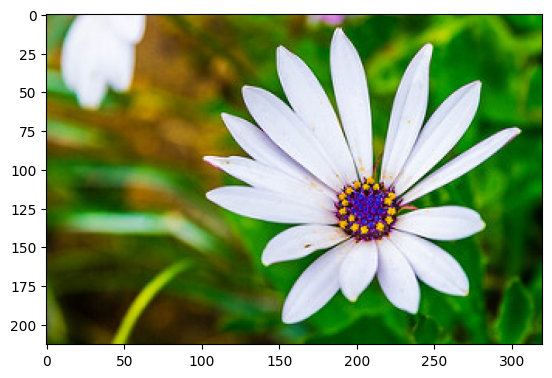

In [12]:
plt.imshow(para_img)

In [13]:
para_img.shape

(213, 320, 3)

In [14]:
os.listdir(train_path+'dandelion')[:20]

['10043234166_e6dd915111_n.jpg',
 '10200780773_c6051a7d71_n.jpg',
 '10294487385_92a0676c7d_m.jpg',
 '10437652486_aa86c14985.jpg',
 '10443973_aeb97513fc_m.jpg',
 '10486992895_20b344ce2d_n.jpg',
 '10617162044_8740d4dd9f_n.jpg',
 '10617191174_9a01753241_n.jpg',
 '1074999133_1e4a1e042e.jpg',
 '10777398353_5a20bb218c.jpg',
 '10778387133_9141024b10.jpg',
 '10779476016_9130714dc0.jpg',
 '10828951106_c3cd47983f.jpg',
 '10919961_0af657c4e8.jpg',
 '10946896405_81d2d50941_m.jpg',
 '11124381625_24b17662bd_n.jpg',
 '11296320473_1d9261ddcb.jpg',
 '11465213433_847c4fa261.jpg',
 '11545123_50a340b473_m.jpg',
 '11768468623_9399b5111b_n.jpg']

In [15]:
dandelion_cell_path = train_path+'dandelion/'+os.listdir(train_path+'dandelion')[7]


In [16]:
dandelion_cell_path

'Flowers_train/train/dandelion/10617191174_9a01753241_n.jpg'

In [17]:
imread(dandelion_cell_path)

array([[[ 46,  32,   6],
        [ 23,  14,   0],
        [ 13,  10,   1],
        ...,
        [ 45,  74,  30],
        [ 41,  69,  21],
        [ 45,  74,  18]],

       [[ 33,  39,  27],
        [ 18,  28,   3],
        [ 26,  40,   7],
        ...,
        [ 45,  73,  24],
        [ 47,  74,  29],
        [ 59,  86,  43]],

       [[ 89, 112,  66],
        [ 48,  68,  40],
        [ 13,  26,  16],
        ...,
        [ 53,  78,  36],
        [ 58,  84,  37],
        [ 66,  93,  42]],

       ...,

       [[ 76, 104,  53],
        [ 53,  77,  25],
        [ 29,  52,   0],
        ...,
        [ 62,  79,  27],
        [ 69,  82,  36],
        [ 71,  82,  39]],

       [[ 56,  84,  26],
        [ 50,  74,  22],
        [ 31,  50,   5],
        ...,
        [ 55,  74,  19],
        [ 61,  79,  27],
        [ 60,  76,  29]],

       [[ 52,  76,  28],
        [ 68,  89,  48],
        [ 11,  26,   0],
        ...,
        [ 50,  71,  14],
        [ 60,  81,  25],
        [ 62,  80,  30]]

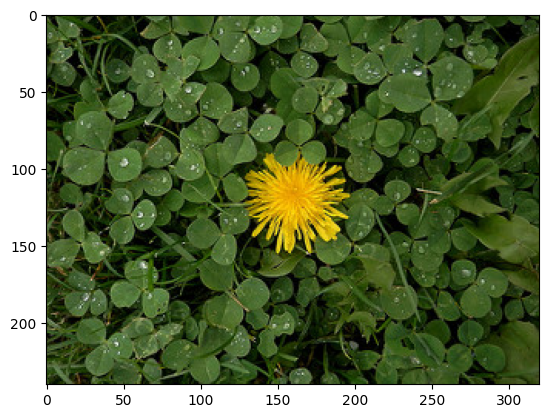

In [18]:
dandelion = imread(dandelion_cell_path)
plt.imshow(dandelion)

In [19]:
# Veri klasörü yolu
data_dir = "C:\\Users\\tr_co\\OneDrive\\Masaüstü\\Techpro_Education\\Deep_Learning\\Proje\\CNN_Flowers\\Flowers_train\\train"

# Bitki türleri
plant_types = ["dandelion", "daisy", "roses", "sunflowers", "tulips"]

# Her bir bitki türü için boş liste oluştur
daisy = []
dandelion = []
roses = []
sunflowers = []
tulips = []

# Her bir bitki türü için dosya sayısını hesaplayın
for plant_type in plant_types:
    # Bitki türü klasöründeki dosya sayısını alın
    file_list = os.listdir(os.path.join(data_dir, plant_type))
    
    # Her bir dosyayı ilgili listeye ekleyin
    if plant_type == "daisy":
        daisy.extend(file_list)
    elif plant_type == "dandelion":
        dandelion.extend(file_list)
    elif plant_type == "roses":
        roses.extend(file_list)
    elif plant_type == "sunflowers":
        sunflowers.extend(file_list)
    elif plant_type == "tulips":
        tulips.extend(file_list)
    
    # Dosya sayısını yazdırın
    print(f"Number of {plant_type} images:", len(file_list))


Number of dandelion images: 718
Number of daisy images: 506
Number of roses images: 512
Number of sunflowers images: 559
Number of tulips images: 639


In [20]:
# Veri klasörü yolu
data_dir = "C:\\Users\\tr_co\\OneDrive\\Masaüstü\\Techpro_Education\\Deep_Learning\\Proje\\CNN_Flowers\\Flowers_train\\train"

# Bitki türleri
plant_types = ["dandelion", "daisy", "roses", "sunflowers", "tulips"]

# Her bir bitki türü için boş liste oluştur
daisy = []
dandelion = []
roses = []
sunflowers = []
tulips = []

# Her bir bitki türü için dosya sayısını hesaplayın
for plant_type in plant_types:
    # Bitki türü klasöründeki dosya sayısını alın
    file_list = os.listdir(os.path.join(data_dir, plant_type))
    
    # Her bir dosyayı ilgili listeye ekleyin
    if plant_type == "daisy":
        daisy.append(file_list)
    elif plant_type == "dandelion":
        dandelion.append(file_list)
    elif plant_type == "roses":
        roses.append(file_list)
    elif plant_type == "sunflowers":
        sunflowers.append(file_list)
    elif plant_type == "tulips":
        tulips.append(file_list)
    
    # Dosya sayısını yazdırın
    print(f"Number of {plant_type} images:", len(file_list))


Number of dandelion images: 718
Number of daisy images: 506
Number of roses images: 512
Number of sunflowers images: 559
Number of tulips images: 639


In [21]:
import os

# Veri klasörü yolu
data_dir = "C:\\Users\\tr_co\\OneDrive\\Masaüstü\\Techpro_Education\\Deep_Learning\\Proje\\CNN_Flowers\\Flowers_train\\train"

# Bitki türleri
plant_types = ["dandelion", "daisy", "roses", "sunflowers", "tulips"]

# Her bir bitki türü için boş liste oluştur
daisy = []
dandelion = []
roses = []
sunflowers = []
tulips = []

# Her bir bitki türü için dosya sayısını hesaplayın ve dosya isimlerini ilgili listeye ekleyin
for plant_type in plant_types:
    # Bitki türü klasöründeki dosya sayısını alın
    file_list = os.listdir(os.path.join(data_dir, plant_type))
    
    # Her bir dosyayı ilgili listeye ekleyin
    if plant_type == "daisy":
        daisy.extend(file_list)
    elif plant_type == "dandelion":
        dandelion.extend(file_list)
    elif plant_type == "roses":
        roses.extend(file_list)
    elif plant_type == "sunflowers":
        sunflowers.extend(file_list)
    elif plant_type == "tulips":
        tulips.extend(file_list)
    
    # Dosya sayısını yazdırın
    print(f"Number of {plant_type} images:", len(file_list))

# Her bitki türü için listenin uzunluğunu hesaplayın
total_length = 0
for plant_list in [daisy, dandelion, roses, sunflowers, tulips]:
    total_length += len(plant_list)

# Toplam sayıyı bulun
total_plants = len(plant_types)

# Her bir grup için ortalama uzunluğu hesaplayın
daisy_average = len(daisy) / total_plants
dandelion_average = len(dandelion) / total_plants
roses_average = len(roses) / total_plants
sunflowers_average = len(sunflowers) / total_plants
tulips_average = len(tulips) / total_plants

print("------------------------:")

# Her bir grup için ortalama uzunluğu yazdırın
print("Daisy average:", daisy_average)
print("Dandelion average:", dandelion_average)
print("Roses average:", roses_average)
print("Sunflowers average:", sunflowers_average)
print("Tulips average:", tulips_average)


Number of dandelion images: 718
Number of daisy images: 506
Number of roses images: 512
Number of sunflowers images: 559
Number of tulips images: 639
------------------------:
Daisy average: 101.2
Dandelion average: 143.6
Roses average: 102.4
Sunflowers average: 111.8
Tulips average: 127.8


ortalamalara baktığımızda 

Average length: 586.8

Daisy average: 101.2

Dandelion average: 143.6

Roses average: 102.4

Sunflowers average: 111.8

Tulips average: 127.8

ortak br shape belirlemek için yaptık. 

Daha yüksek de seçilebiliriz ama işlem hacmi artacaktır. zaman ve donanıma bağlı olarak Best practice yaklaşım sergileyebiliriz 

In [22]:
image_shape = (140,140,3)

In [23]:
variables = [daisy, dandelion, roses, sunflowers, tulips]
for var_name, var in zip(["daisy", "dandelion", "roses", "sunflowers", "tulips"], variables):
    max_val = max(var)    
    print(f"Maksimum değer for {var_name}: {max_val}")


Maksimum değer for daisy: 99306615_739eb94b9e_m.jpg
Maksimum değer for dandelion: 9965757055_ff01b5ee6f_n.jpg
Maksimum değer for roses: 99383371_37a5ac12a3_n.jpg
Maksimum değer for sunflowers: 9904127656_f76a5a4811_m.jpg
Maksimum değer for tulips: 9976515506_d496c5e72c.jpg


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
image_gen = ImageDataGenerator(rotation_range=15, 
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               rescale=1/255,
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest')

In [26]:
para_img.shape

(213, 320, 3)

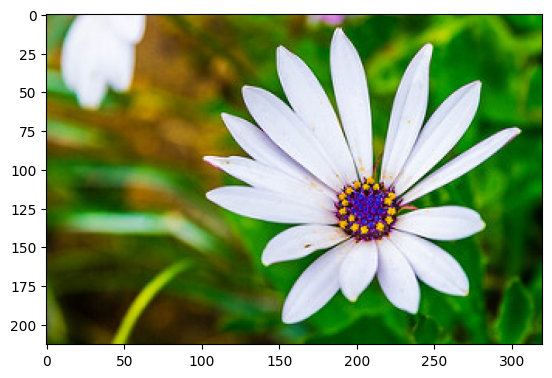

In [27]:
plt.imshow(para_img)

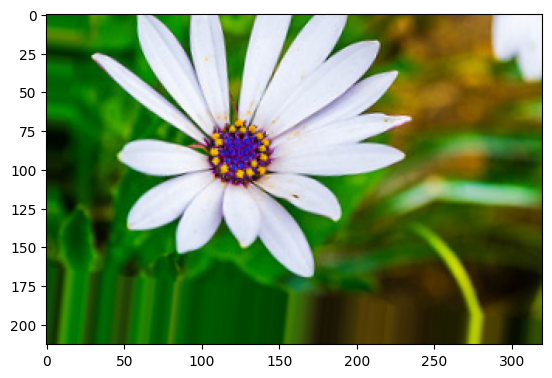

In [28]:
plt.imshow(image_gen.random_transform(para_img))

In [29]:
image_gen.flow_from_directory(train_path)

Found 2934 images belonging to 5 classes.


# Creating the Model

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

## Model 1
 

In [31]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

C:\Users\tr_co\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 140, 140, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 70, 70, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 70, 70, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 70, 70, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 35, 35, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 35, 35, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 35, 35, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 17, 17, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4624)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       592,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 625,461 (2.39 MB)

 Trainable params: 625,461 (2.39 MB)

 Non-trainable params: 0 (0.00 B)

## Early Stopping

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

## Training the Model

In [35]:
batch_size = 32
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=(140,140),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical', shuffle=True, seed=42)

Found 2934 images belonging to 5 classes.


In [36]:
train_image_gen.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [37]:
test_path = 'Flowers_test'+'/test/'

In [38]:
os.listdir(test_path)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [39]:
image_gen.flow_from_directory(test_path)

Found 736 images belonging to 5 classes.


In [40]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=(140,140),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical', shuffle=True, seed=42)

Found 736 images belonging to 5 classes.


In [41]:
results = model.fit(train_image_gen,epochs=10,
                    validation_data=test_image_gen,
                    callbacks=[early_stop])

Epoch 1/10


C:\Users\tr_co\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 45s 456ms/step - accuracy: 0.2833 - loss: 1.5144 - val_accuracy: 0.4511 - val_loss: 1.3411
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 431ms/step - accuracy: 0.4374 - loss: 1.2647 - val_accuracy: 0.4946 - val_loss: 1.1577
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 427ms/step - accuracy: 0.4943 - loss: 1.1667 - val_accuracy: 0.5829 - val_loss: 1.0724
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 435ms/step - accuracy: 0.5593 - loss: 1.0859 - val_accuracy: 0.6345 - val_loss: 0.9554
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 447ms/step - accuracy: 0.6285 - loss: 0.9815 - val_accuracy: 0.6427 - val_loss: 0.8955
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 44s 463ms/step - accuracy: 0.6350 - loss: 0.9444 - val_accuracy: 0.6671 - val_loss: 0.8404
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 44s 466ms/step - accuracy: 0.6293 - loss: 0.9483 - val_accuracy: 0.6630 - val_loss: 0.8580
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 44s 462ms/step - accuracy: 0.6586 - loss: 0.8741 - val_accuracy: 0.695

## Model 2
### Dropout

In [42]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [44]:
results = model.fit(train_image_gen,epochs=10,
                    validation_data=test_image_gen);

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 66s 707ms/step - accuracy: 0.4149 - loss: 1.2892 - val_accuracy: 0.4742 - val_loss: 1.1971
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 71s 760ms/step - accuracy: 0.4776 - loss: 1.2256 - val_accuracy: 0.4579 - val_loss: 1.2183
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 76s 810ms/step - accuracy: 0.4791 - loss: 1.1755 - val_accuracy: 0.5476 - val_loss: 1.0753
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 78s 829ms/step - accuracy: 0.5481 - loss: 1.1186 - val_accuracy: 0.5122 - val_loss: 1.1383
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 76s 807ms/step - accuracy: 0.5545 - loss: 1.0980 - val_accuracy: 0.5584 - val_loss: 1.0688
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 76s 804ms/step - accuracy: 0.5614 - loss: 1.0908 - val_accuracy: 0.5761 - val_loss: 1.0344
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 75s 801ms/step - accuracy: 0.5814 - loss: 1.0346 - val_accuracy: 0.5856 - val_loss: 1.0153
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 77s 820ms/step - accuracy: 0.6192 - loss: 0.9925 - val_accu

# Sonuc 1

Dropout oranını artırmak, modelin daha fazla nöronu devre dışı bırakmasına ve dolayısıyla daha fazla aşırı öğrenmeyi engellemesine neden olabilir.

Sonuçlar arasında yapılan karşılaştırmada, ikinci modelin eğitim ve doğrulama metrikleri genellikle birinci modele göre daha düşük görünüyor.

Dropout oranının çok yüksek olmasının modelin öğrenme kapasitesini kısıtlayabileceğini düşündürebilir.

# Model 1 Result 

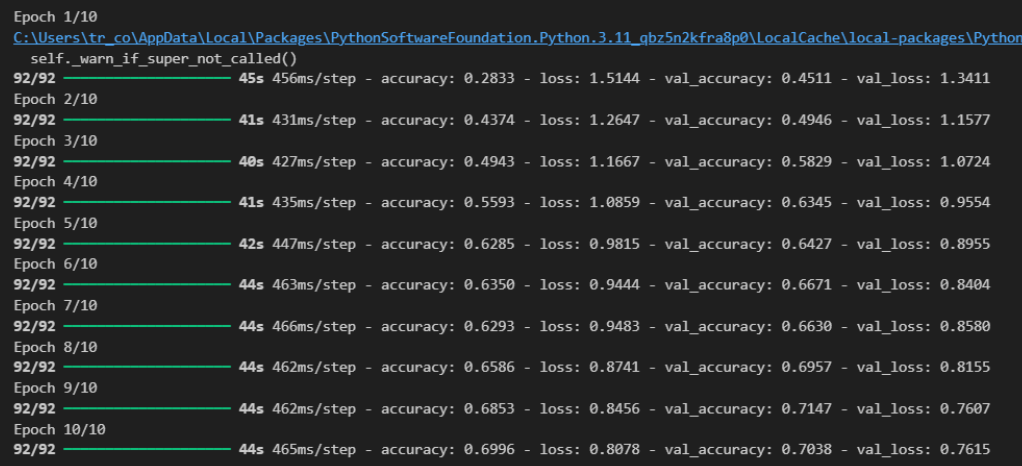

## Model 3
### çıkış katmanları

In [45]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

C:\Users\tr_co\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [47]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 140, 140, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 70, 70, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 70, 70, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 70, 70, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 35, 35, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 35, 35, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 35, 35, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 17, 17, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4624)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       592,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,931,681 (7.37 MB)

 Trainable params: 643,893 (2.46 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,287,788 (4.91 MB)

In [46]:
results = model.fit(train_image_gen,epochs=10,
                    validation_data=test_image_gen);

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 66s 671ms/step - accuracy: 0.2397 - loss: 1.6114 - val_accuracy: 0.4348 - val_loss: 1.4247
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 68s 720ms/step - accuracy: 0.4293 - loss: 1.3498 - val_accuracy: 0.4552 - val_loss: 1.2924
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 69s 731ms/step - accuracy: 0.4465 - loss: 1.2439 - val_accuracy: 0.5258 - val_loss: 1.1189
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 75s 797ms/step - accuracy: 0.4965 - loss: 1.1782 - val_accuracy: 0.5639 - val_loss: 1.0362
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 78s 826ms/step - accuracy: 0.5537 - loss: 1.1128 - val_accuracy: 0.5720 - val_loss: 0.9905
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 77s 818ms/step - accuracy: 0.5742 - loss: 1.0449 - val_accuracy: 0.5924 - val_loss: 0.9687
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 77s 821ms/step - accuracy: 0.5882 - loss: 1.0311 - val_accuracy: 0.6495 - val_loss: 0.8975
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 79s 836ms/step - accuracy: 0.6074 - loss: 0.9844 - val_accu

Sonuc 2
 
Modelde çıkış katmanları arttırılmıştır. 

Bu değişiklik sonucunda elde edilen değerler düşmüştür. 

Bunun nedeni, modelin daha karmaşık hale gelmesi ve eğitim sırasında daha fazla bilgi kaybı yaşanması olabilir.

# Model 1 Result 

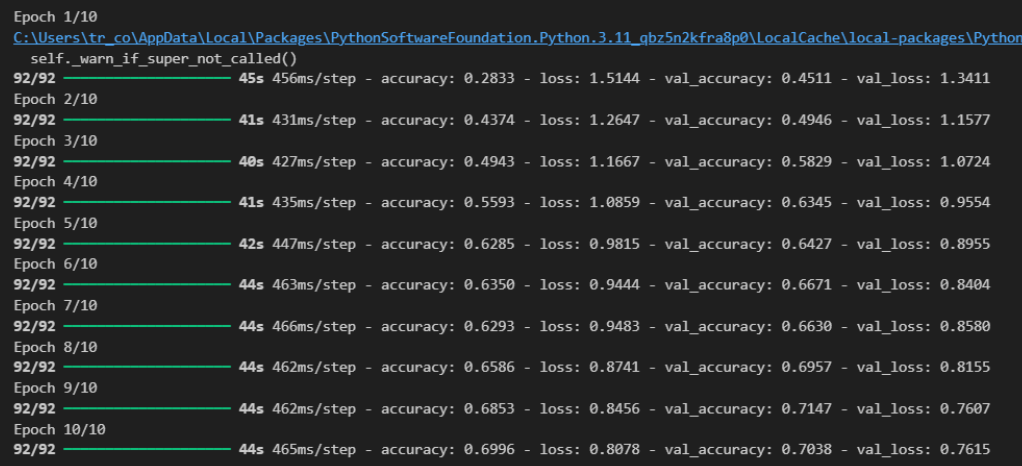

# Model 4
## Giriş Katmnaları

In [48]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()

# İlk Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

# İkinci Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

# Üçüncü Convolutional Layer
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

# Dördüncü Convolutional Layer
model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

# Beşinci Convolutional Layer
model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

# Düzleştirme (Flattening)
model.add(Flatten())

# Tam Bağlantı (Fully Connected) Katmanları
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

# Çıkış Katmanı
model.add(Dense(5, activation='softmax'))

# Modelin Derlenmesi
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [49]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 140, 140, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 70, 70, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 70, 70, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 70, 70, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 35, 35, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 35, 35, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 35, 35, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 17, 17, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 17, 17, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 17, 17, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,717 (202.02 KB)

 Trainable params: 51,717 (202.02 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
results = model.fit(train_image_gen,epochs=10,
                    validation_data=test_image_gen);

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 43s 430ms/step - accuracy: 0.2177 - loss: 1.5813 - val_accuracy: 0.2948 - val_loss: 1.5132
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 39s 409ms/step - accuracy: 0.3487 - loss: 1.4336 - val_accuracy: 0.4837 - val_loss: 1.2300
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 418ms/step - accuracy: 0.4536 - loss: 1.2449 - val_accuracy: 0.5245 - val_loss: 1.1907
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 425ms/step - accuracy: 0.5025 - loss: 1.1549 - val_accuracy: 0.5611 - val_loss: 1.0620
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 434ms/step - accuracy: 0.5514 - loss: 1.0875 - val_accuracy: 0.6128 - val_loss: 0.9628
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 446ms/step - accuracy: 0.5796 - loss: 1.0382 - val_accuracy: 0.6304 - val_loss: 0.9403
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 43s 457ms/step - accuracy: 0.6110 - loss: 0.9884 - val_accuracy: 0.6332 - val_loss: 0.8815
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 43s 458ms/step - accuracy: 0.6376 - loss: 0.9162 - val_accu

Sonuc 3

İlk model, ikinci modele kıyasla daha yüksek bir doğruluk elde etti. 

Bu, modelin daha az sayıda Convolutional Layer ile daha iyi performans gösterdiğini gösterebilir.

Daha fazla Convolutional Layer eklemek, teorik olarak daha karmaşık özelliklerin öğrenilmesine ve daha iyi performans elde edilmesine yardımcı olabilir. 

Ancak, bu durum her zaman geçerli değildir ve aşırı karmaşıklık ağın genelleme yeteneğini azaltabilir.

# Model 1 Result 

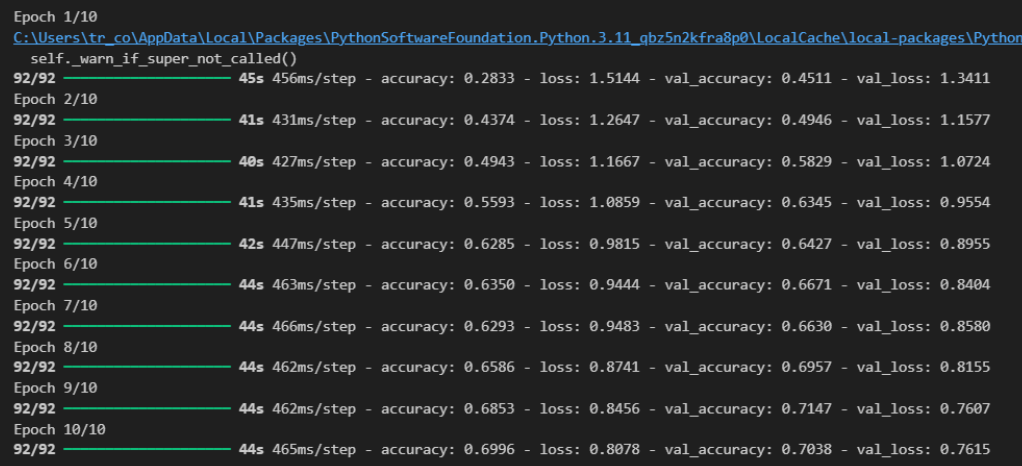

En iyi scorları Model 1 den aldığımız için Model 1 den devam

In [51]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

batch_size = 32
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=(140,140),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical', shuffle=True, seed=42)

Found 2934 images belonging to 5 classes.


In [54]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 140, 140, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 70, 70, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 70, 70, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 70, 70, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 35, 35, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 35, 35, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 35, 35, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 17, 17, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 17, 17, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4624)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       592,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,876,385 (7.16 MB)

 Trainable params: 625,461 (2.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,250,924 (4.77 MB)

# Epochs Sayılarını Karşılaştırma
### Epochs = 10

In [52]:
results = model.fit(train_image_gen,epochs=10,
                    validation_data=test_image_gen,)

Epoch 1/10


C:\Users\tr_co\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.2307 - loss: 1.5874 - val_accuracy: 0.3995 - val_loss: 1.4008
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.3986 - loss: 1.3623 - val_accuracy: 0.4524 - val_loss: 1.2497
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.4357 - loss: 1.2585 - val_accuracy: 0.5312 - val_loss: 1.1516
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.4778 - loss: 1.1836 - val_accuracy: 0.5611 - val_loss: 1.0936
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.5272 - loss: 1.1534 - val_accuracy: 0.5571 - val_loss: 1.0554
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.5444 - loss: 1.0903 - val_accuracy: 0.6196 - val_loss: 1.0136
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.5914 - loss: 1.0353 - val_accuracy: 0.6535 - val_loss: 0.9285
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.6146 - loss: 0.9914 - val_accuracy: 0.6535 - val_loss: 0.8933
Epo

### Epochs = 5

In [53]:
results = model.fit(train_image_gen,epochs=5,
                    validation_data=test_image_gen,)

Epoch 1/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.6503 - loss: 0.8930 - val_accuracy: 0.6807 - val_loss: 0.8285
Epoch 2/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.6942 - loss: 0.8488 - val_accuracy: 0.7065 - val_loss: 0.7815
Epoch 3/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.6910 - loss: 0.8445 - val_accuracy: 0.6889 - val_loss: 0.8337
Epoch 4/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.6944 - loss: 0.8406 - val_accuracy: 0.6957 - val_loss: 0.8014
Epoch 5/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.6815 - loss: 0.8009 - val_accuracy: 0.7188 - val_loss: 0.7626


Sonuc 4

Son modelin daha iyi performans gösterdiğini söyleyebiliriz. 

Daha az epoch kullanmasına rağmen, daha istikrarlı sonuçlar elde etmiş ve daha yüksek doğruluk oranlarına ulaşmıştır

# Evaluating the Model

In [55]:
summary = pd.DataFrame(model.history.history)
summary.head()

,accuracy,loss,val_accuracy,val_loss
0,0.660873,0.868827,0.680707,0.828532
1,0.683027,0.860177,0.706522,0.781488
2,0.682345,0.846206,0.688859,0.833725
3,0.693592,0.826833,0.695652,0.801363
4,0.697001,0.794525,0.718750,0.762562


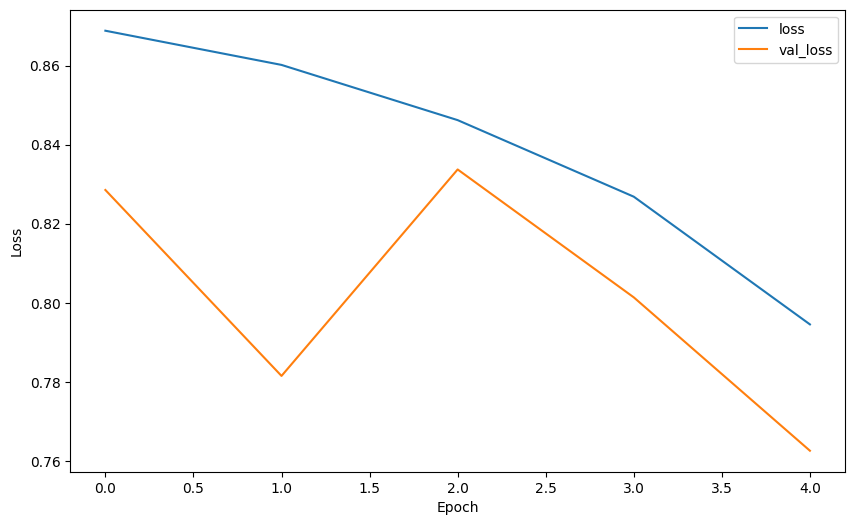

In [56]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

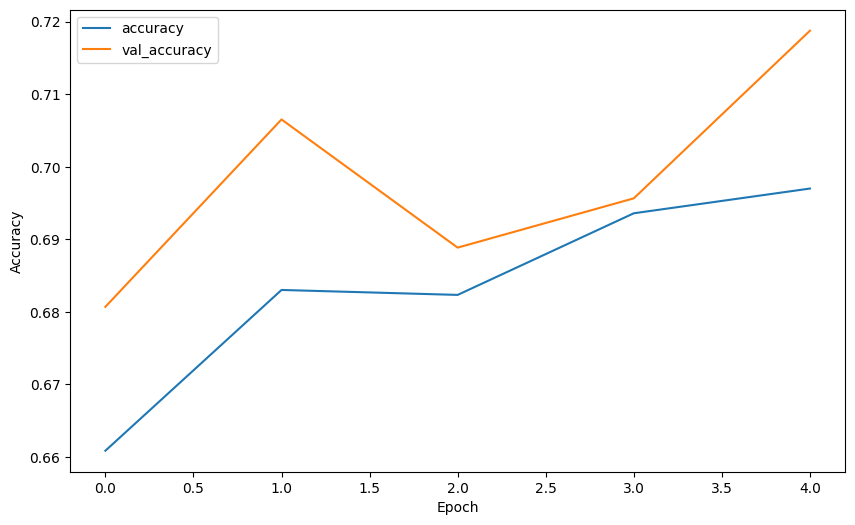

In [57]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [58]:
model.metrics_names

['loss', 'compile_metrics']

In [59]:
model.evaluate(test_image_gen)

23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 247ms/step - accuracy: 0.7226 - loss: 0.7929


[0.7628669142723083, 0.7241848111152649]

accuracy: 0.7226

loss: 0.7929

### model.save

In [79]:
model.save('flowers_model.h5')


In [80]:
from tensorflow.keras.saving import save_model

save_model(model, 'flowers_model.keras')

# Predicting on an Image

In [81]:
para_cell

'Flowers_train/train/daisy/10770585085_4742b9dac3_n.jpg'

In [82]:
my_image = image.load_img(para_cell,target_size=image_shape)

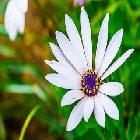

In [83]:
my_image

In [84]:
type(my_image)

PIL.Image.Image

In [85]:
my_image = image.img_to_array(my_image)

In [86]:
type(my_image)

numpy.ndarray

In [87]:
my_image.shape

(140, 140, 3)

In [88]:
my_image = np.expand_dims(my_image, axis=0)

In [89]:
my_image.shape

(1, 140, 140, 3)

In [90]:
model.predict(my_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


array([[1., 0., 0., 0., 0.]], dtype=float32)

In [91]:
train_image_gen.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [92]:
test_image_gen.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

# Predict

daisy ------------> 0 sınıfından bir resim aldım ve tahmin etmesini sağladım


In [102]:
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf

# Modeli yükleyin
model = tf.keras.models.load_model('flowers_model.keras')

# Yeni görüntüyü açın ve uygun bir formata dönüştürün
image_path = "C:\\Users\\tr_co\\OneDrive\\Masaüstü\\Techpro_Education\\Deep_Learning\\Proje\\CNN_Flowers\\Flowers_test\\test\\daisy\\506348009_9ecff8b6ef.jpg"
img = image.load_img(image_path, target_size=(140, 140))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Model eğitilirken normalizasyon yapıldıysa yapılmalıdır

# Tahmin yapın
prediction = model.predict(img_array)

# Tahmin edilen sınıfı ekrana yazdırın
predicted_class = np.argmax(prediction)
print('Tahmin edilen sınıf:', predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
Tahmin edilen sınıf: 0


dandelion ------------> 1 sınıfından bir resim aldım ve tahmin etmesini sağladım


In [100]:
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf

# Modeli yükleyin
model = tf.keras.models.load_model('flowers_model.keras')

# Yeni görüntüyü açın ve uygun bir formata dönüştürün
image_path = "C:\\Users\\tr_co\\OneDrive\\Masaüstü\\Techpro_Education\\Deep_Learning\\Proje\\CNN_Flowers\\Flowers_test\\test\\dandelion\\14048849371_ec9dbafaeb_m.jpg"
img = image.load_img(image_path, target_size=(140, 140))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Model eğitilirken normalizasyon yapıldıysa yapılmalıdır

# Tahmin yapın
prediction = model.predict(img_array)

# Tahmin edilen sınıfı ekrana yazdırın
predicted_class = np.argmax(prediction)
print('Tahmin edilen sınıf:', predicted_class)


C:\Users\tr_co\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 14 variables whereas the saved optimizer has 26 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Tahmin edilen sınıf: 2


roses: 2 ------------> 2 sınıfından bir resim aldım ve tahmin etmesini sağladım

In [101]:
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf

# Modeli yükleyin
model = tf.keras.models.load_model('flowers_model.keras')

# Yeni görüntüyü açın ve uygun bir formata dönüştürün
image_path = "C:\\Users\\tr_co\\OneDrive\\Masaüstü\\Techpro_Education\\Deep_Learning\\Proje\\CNN_Flowers\\Flowers_test\\test\\roses\\9633056561_6f1b7e8faf_m.jpg"
img = image.load_img(image_path, target_size=(140, 140))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Model eğitilirken normalizasyon yapıldıysa yapılmalıdır

# Tahmin yapın
prediction = model.predict(img_array)

# Tahmin edilen sınıfı ekrana yazdırın
predicted_class = np.argmax(prediction)
print('Tahmin edilen sınıf:', predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
Tahmin edilen sınıf: 4


sunflowers ------------> 3 sınıfından bir resim aldım ve tahmin etmesini sağladım

In [96]:
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf

# Modeli yükleyin
model = tf.keras.models.load_model('flowers_model.keras')

# Yeni görüntüyü açın ve uygun bir formata dönüştürün
image_path = "C:\\Users\\tr_co\\OneDrive\\Masaüstü\\Techpro_Education\\Deep_Learning\\Proje\\CNN_Flowers\\Flowers_test\\test\\sunflowers\\3749091071_c146b33c74_n.jpg"
img = image.load_img(image_path, target_size=(140, 140))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Model eğitilirken normalizasyon yapıldıysa yapılmalıdır

# Tahmin yapın
prediction = model.predict(img_array)

# Tahmin edilen sınıfı ekrana yazdırın
predicted_class = np.argmax(prediction)
print('Tahmin edilen sınıf:', predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Tahmin edilen sınıf: 3


tulips ------------> 4 sınıfından bir resim aldım ve tahmin etmesini sağladım

In [104]:
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf

# Modeli yükleyin
model = tf.keras.models.load_model('flowers_model.keras')

# Yeni görüntüyü açın ve uygun bir formata dönüştürün
image_path = "C:\\Users\\tr_co\\OneDrive\\Masaüstü\\Techpro_Education\\Deep_Learning\\Proje\\CNN_Flowers\\Flowers_test\\test\\tulips\\13197345653_0f685b3c97_n.jpg"
img = image.load_img(image_path, target_size=(140, 140))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Model eğitilirken normalizasyon yapıldıysa yapılmalıdır

# Tahmin yapın
prediction = model.predict(img_array)

# Tahmin edilen sınıfı ekrana yazdırın
predicted_class = np.argmax(prediction)
print('Tahmin edilen sınıf:', predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Tahmin edilen sınıf: 4
